In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.dirname(os.path.dirname(os.path.abspath(os.path.join('.'))))
if module_path not in sys.path:
    print('Add root path to system path: ', module_path)
    sys.path.append(module_path)
module_path += '/'

Add root path to system path:  D:\Projets\Georgia Tech\Comp Social Science\cs6471-project


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis

## OffensEval

In [4]:
df_offenseval = pd.read_csv('./../../data/training_data/offenseval-training-v1.tsv', delimiter='\t')
print(df_offenseval.shape)
df_offenseval.head()

(13240, 5)


,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [5]:
df_offenseval_test = pd.read_csv('./../../data/test_data/testset-levela.tsv', delimiter='\t')
print(df_offenseval_test.shape)
df_offenseval_test.head()

(860, 2)


,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


In [6]:
# calculate average post length
list_tweets = list(df_offenseval['tweet']) + list(df_offenseval_test['tweet'])
print(np.mean([len(tweet) for tweet in list_tweets]))

127.1436879432624


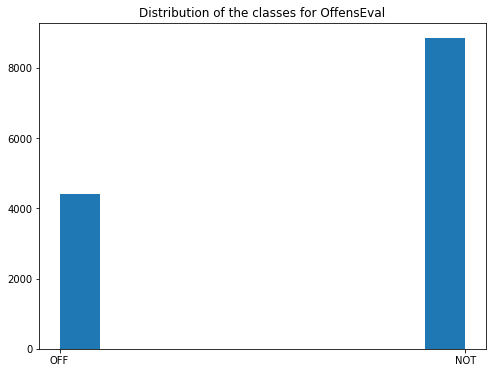

In [7]:
title = 'OffensEval'
plt.figure(figsize=(8, 6))
plt.title('Distribution of the classes for {}'.format(title))
plt.hist(df_offenseval['subtask_a'])
plt.show()

## Implicit Hate

In [8]:
df_stg1 = pd.read_csv('./../../data/original_datasets/implicit_hate_v1_stg1_posts.tsv', delimiter='\t')
print(df_stg1.shape)
df_stg1.head()

(21480, 2)


,post,class
0,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,b.higher education is a part of european cult...,not_hate
2,"has a problem with "" the whites "" "" and "" "" ...",not_hate
3,is yasir qadhi a hate preacher for calling ch...,not_hate
4,"rt "" : how three million germans mass murder...",not_hate


In [9]:
df_stg1.agg({'class': lambda x: x.value_counts()})

,class
not_hate,13291
implicit_hate,7100
explicit_hate,1089


In [10]:
# calculate average post length
df_stg1['length'] = df_stg1['post'].apply(len)
df_stg1.agg({'length': lambda x: x.mean()})

length    89.446555
dtype: float64

In [11]:
df_stg2 = pd.read_csv('./../../data/original_datasets/implicit_hate_v1_stg2_posts.tsv', delimiter='\t')
df_stg2.head()

,post,implicit_class,extra_implicit_class
0,""" : jewish harvard professor noel ignatiev w...",white_grievance,NaN
1,rt : tune in today's jmt for my interview w /...,irony,NaN
2,: : hate posters ? you want hate buddy ? read ...,white_grievance,NaN
3,: hunt for white women : black racist serial k...,stereotypical,NaN
4,: looks like he was a fan of the islamic jew-h...,stereotypical,NaN


In [12]:
df_stg2.agg({'implicit_class': lambda x: x.value_counts()})

,implicit_class
white_grievance,1538
incitement,1269
stereotypical,1133
inferiority,863
irony,797
threatening,666
other,80


In [13]:
# aggregate additional implicit classes where not NaN
df_stg2.agg({'extra_implicit_class': lambda x: x.value_counts()})

,extra_implicit_class
inferiority,55
white_grievance,34
irony,12
stereotypical,12
incitement,11
threatening,6


In [14]:
df_stg3 = pd.read_csv('./../../data/original_datasets/implicit_hate_v1_stg3_posts.tsv', delimiter='\t')
df_stg3.head()

,post,target,implied_statement
0,"rt "" white privilege "" "" is when the gun jam...",minority groups,people in minority groups are all in gangs
1,if you are white in that state watch yourself !,non-white people,non-white people are dangerous
2,so the 500 % increase in h1b visas ? yeah i'm ...,Immigrants,Immigrants are undesirable
3,rt antiwhites expose their hatred of white ki...,Anti-whites,Anti-whites hate white people
4,capitalism like communism is an enemy of the...,Capitalists,Capitalists don't like white people.


In [15]:
df_stg3.agg({'target': lambda x: x.value_counts()})

,target
Minorities,732
Immigrants,653
white people,618
Muslims,574
Jews,436
...,...
Mexican nationalists,1
Indian journalists,1
catholics & jews,1
Corporate leaders,1


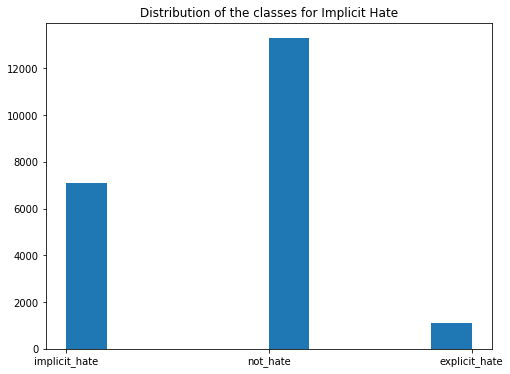

In [16]:
title = 'Implicit Hate'
plt.figure(figsize=(8, 6))
plt.title('Distribution of the classes for {}'.format(title))
plt.hist(df_stg1['class'])
plt.show()

## COVID Hate

In [17]:
covid_df = pd.read_csv('./../../data/original_datasets/covid_hate.csv')
print(covid_df.shape)
covid_df.head()

(2290, 3)


,Tweet ID,Text,label
0,1242553623260868608,Are we still allowed to quote ancient Chinese ...,0
1,1246508137638580225,@mamacat2u @VBeltiz More power to you! This C...,0
2,1233468243534372865,"CNBC: WHO, Tedros reiterated that the virus co...",0
3,1243626072387747841,"""The heightened racism experienced by Asian co...",1
4,1225611530978217989,Coronavirus and Nepali in China: KP Oli has di...,0


In [18]:
covid_df['label'] = covid_df['label'].replace({0: 'not_hate', 1: 'counterhate', 2: 'hate'})
covid_df.agg({'label': lambda x: x.value_counts()})

,label
not_hate,1344
counterhate,517
hate,429


In [19]:
# calculate average post length
covid_df['length'] = covid_df['Text'].apply(len)
covid_df.agg({'length': lambda x: x.mean()})

length    173.279476
dtype: float64

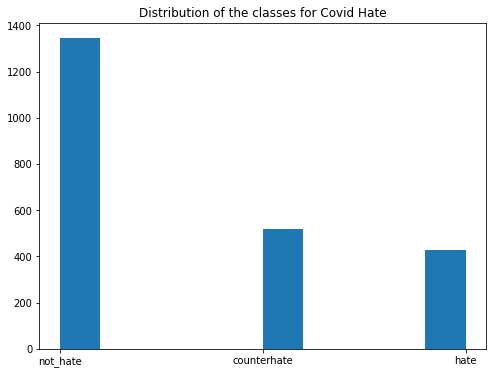

In [20]:
title = 'Covid Hate'
plt.figure(figsize=(8, 6))
plt.title('Distribution of the classes for {}'.format(title))
plt.hist(covid_df['label'])
plt.show()

# SBF

In [21]:
# import SBF datasets SBFv2.dev.csv, SBFv2.trn.csv, SBFv2.tst.csv and concatenate them vertically
df_sbf_trn = pd.read_csv('./../../data/original_datasets/SBFv2.trn.csv')
df_sbf_dev = pd.read_csv('./../../data/original_datasets/SBFv2.dev.csv')

In [22]:
# concatenate the datasets
df_sbf = pd.concat([df_sbf_trn, df_sbf_dev], ignore_index=True)
print(df_sbf.shape)
df_sbf.head()

(129638, 18)


,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorGender,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,annotatorPolitics,annotatorRace,annotatorAge,post,targetMinority,targetCategory,targetStereotype
0,0.0,0.66,0.0,NaN,1.0,woman,NaN,NaN,NaN,-8935932304856669427,363A7XIFV4G2799C5V96YERJA9AVAM,liberal,white,45.0,RT @_LexC__: I'm convinced that some of y'all ...,NaN,NaN,NaN
1,0.0,0.66,0.0,NaN,0.5,man,NaN,NaN,NaN,6347880360297734464,363A7XIFV4G2799C5V96YERJA9AVAM,mod-liberal,white,35.0,RT @_LexC__: I'm convinced that some of y'all ...,NaN,NaN,NaN
2,0.0,0.33,0.0,NaN,0.5,man,NaN,NaN,NaN,-7452610791699819066,363A7XIFV4G2799C5V96YERJA9AVAM,liberal,asian,23.0,RT @_LexC__: I'm convinced that some of y'all ...,NaN,NaN,NaN
3,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-500114755446676507,3JTPR5MTZS6RLS3JBV4IOU0G2X35K5,liberal,white,25.0,RT @iBeZo: Stupid fucking nigger LeBron. You f...,black folks,race,all stupid
4,1.0,1.00,0.0,NaN,1.0,man,NaN,NaN,0.0,-500114755446676507,3JTPR5MTZS6RLS3JBV4IOU0G2X35K5,liberal,white,25.0,RT @iBeZo: Stupid fucking nigger LeBron. You f...,black folks,race,are not people but apes.


In [23]:
# calculate the average length of the posts
df_sbf['length'] = df_sbf['post'].apply(len)
df_sbf.agg({'length': lambda x: x.mean()})

length    109.326239
dtype: float64

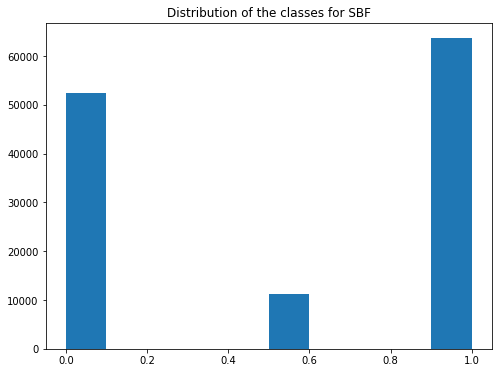

In [24]:
title = 'SBF'
plt.figure(figsize=(8, 6))
plt.title('Distribution of the classes for {}'.format(title))
plt.hist(df_sbf['offensiveYN'])
plt.show()

## Get examples

In [25]:
def filter_local_example(string, indexes=[]):
    list_words = string.split(" ")
    #print(list_words)
    for idx in indexes:
        list_words[idx] = list_words[idx][0] + '*'*len(list_words[idx][1: -1]) + list_words[idx][-1]
    #print(list_words)
    return " ".join(list_words)

In [26]:
print('1 Hate:', filter_local_example(df_offenseval.iloc[3]['tweet'], indexes=[6]))
print('1 Non-Hate:', df_offenseval.iloc[2]['tweet'][:80])
print()
print('2 Hate:', df_stg1.iloc[0]['post'])
print('2 Non-Hate:', df_stg1.iloc[1]['post'][:78])
print()
print('3 Hate:', filter_local_example(df_sbf.iloc[3]['post'], indexes=[4, 12]))
print('3 Non-Hate:', df_sbf[df_sbf['offensiveYN'] == 0.0].iloc[15]['post'])
print()
print('4 Hate:', filter_local_example(covid_df.iloc[19]['Text'][:88], indexes=[11, 13]))
print('4 Non-Hate:', covid_df.iloc[0]['Text'])

1 Hate: @USER Someone should'veTaken" this piece of s**t to a volcano. 😂"
1 Non-Hate: Amazon is investigating Chinese employees who are selling internal data to third

2 Hate:   " : jewish harvard professor noel ignatiev wants to abolish the white race via #wr " " "
2 Non-Hate:  b.higher education is a part of european culture  that was imported to other 

3 Hate: RT @iBeZo: Stupid fucking n****r LeBron. You flopping stupid jungle bunny monkey f*****.
3 Non-Hate: @ConanOBrien dat is one ugly animal but da monkey is adorable.

4 Hate: I'm losing my mind 😵 quarantine is making me mad. #Chinese d********s ate s**t infected 
4 Non-Hate: Are we still allowed to quote ancient Chinese proverbs, or is that racist? #RacismIsAVirus
